# Graph-tool tutorial

The following tutorial demonstrates working with graphs using the [graph-tool python module](https://graph-tool.skewed.de/). In the process, you will learn how to:

* create a graph 'by-hand'
* perform basic network analysis
* visualize graphs and their properties

In [10]:
import graph_tool.all as gt
import pandas as pd
import numpy as np
from IPython.display import display
%matplotlib inline
print("graph-tool version: {}".format(gt.__version__.split(' ')[0]))

/Users/zhangchao/opt/anaconda3/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:1494: RuntimeWarning: Error importing Gtk module: No module named 'gi'; GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


graph-tool version: 2.29


# Show datasets in collection

In [11]:
with pd.option_context('display.max_colwidth', -1):
    display(pd.DataFrame.from_records(gt.collection.descriptions,
                                      index=['description']).transpose())

,description
adjnoun,"Word adjacencies: adjacency network of common adjectives and nouns in the novel David Copperfield by Charles Dickens. Please cite M. E. J. Newman, Phys. Rev. E 74, 036104 (2006). Retrieved from `Mark Newman's website <http://www-personal.umich.edu/~mejn/netdata/>`_."
as-22july06,"Internet: a symmetrized snapshot of the structure of the Internet at the level of autonomous systems, reconstructed from BGP tables posted by the `University of Oregon Route Views Project <http://routeviews.org/>`_. This snapshot was created by Mark Newman from data for July 22, 2006 and is not previously published. Retrieved from `Mark Newman's website <http://www-personal.umich.edu/~mejn/netdata/>`_."
astro-ph,"Astrophysics collaborations: weighted network of coauthorships between scientists posting preprints on the Astrophysics E-Print Archive between Jan 1, 1995 and December 31, 1999. Please cite M. E. J. Newman, Proc. Natl. Acad. Sci. USA 98, 404-409 (2001). Retrieved from `Mark Newman's website <http://www-personal.umich.edu/~mejn/netdata/>`_."
celegansneural,"Neural network: A directed, weighted network representing the neural network of C. Elegans. Data compiled by D. Watts and S. Strogatz and made available on the web `here <http://cdg.columbia.edu/cdg/datasets>`_. Please cite D. J. Watts and S. H. Strogatz, Nature 393, 440-442 (1998). Original experimental data taken from J. G. White, E. Southgate, J. N. Thompson, and S. Brenner, Phil. Trans. R. Soc. London 314, 1-340 (1986). Retrieved from `Mark Newman's website <http://www-personal.umich.edu/~mejn/netdata/>`_."
cond-mat,"Condensed matter collaborations 1999: weighted network of coauthorships between scientists posting preprints on the Condensed Matter E-Print Archive between Jan 1, 1995 and December 31, 1999. Please cite M. E. J. Newman, The structure of scientific collaboration networks, Proc. Natl. Acad. Sci. USA 98, 404-409 (2001). Retrieved from `Mark Newman's website <http://www-personal.umich.edu/~mejn/netdata/>`_."
cond-mat-2003,"Condensed matter collaborations 2003: updated network of coauthorships between scientists posting preprints on the Condensed Matter E-Print Archive. This version includes all preprints posted between Jan 1, 1995 and June 30, 2003. The largest component of this network, which contains 27519 scientists, has been used by several authors as a test-bed for community-finding algorithms for large networks; see for example J. Duch and A. Arenas, Phys. Rev. E 72, 027104 (2005). These data can be cited as M. E. J. Newman, Proc. Natl. Acad. Sci. USA 98, 404-409 (2001). Retrieved from `Mark Newman's website <http://www-personal.umich.edu/~mejn/netdata/>`_."
cond-mat-2005,"Condensed matter collaborations 2005: updated network of coauthorships between scientists posting preprints on the Condensed Matter E-Print Archive. This version includes all preprints posted between Jan 1, 1995 and March 31, 2005. Please cite M. E. J. Newman, Proc. Natl. Acad. Sci. USA 98, 404-409 (2001). Retrieved from `Mark Newman's website <http://www-personal.umich.edu/~mejn/netdata/>`_."
dolphins,"Dolphin social network: an undirected social network of frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand. Please cite D. Lusseau, K. Schneider, O. J. Boisseau, P. Haase, E. Slooten, and S. M. Dawson, Behavioral Ecology and Sociobiology 54, 396-405 (2003). Retrieved from `Mark Newman's website <http://www-personal.umich.edu/~mejn/netdata/>`_."
email-Enron,"Enron email communication network covers all the email communication within a dataset of around half million emails. This data was originally made public, and posted to the web, by the Federal Energy Regulatory Commission during its investigation. Nodes of the network are email addresses and if an address i sent at least one email to address j, the graph contains an undirected edge from i to j. Note that non-Enron email addresses act as sinks and sources in the network as we only obs

In [12]:
g = gt.collection.data['karate']
g

<Graph object, undirected, with 34 vertices and 78 edges at 0x1a48324190>

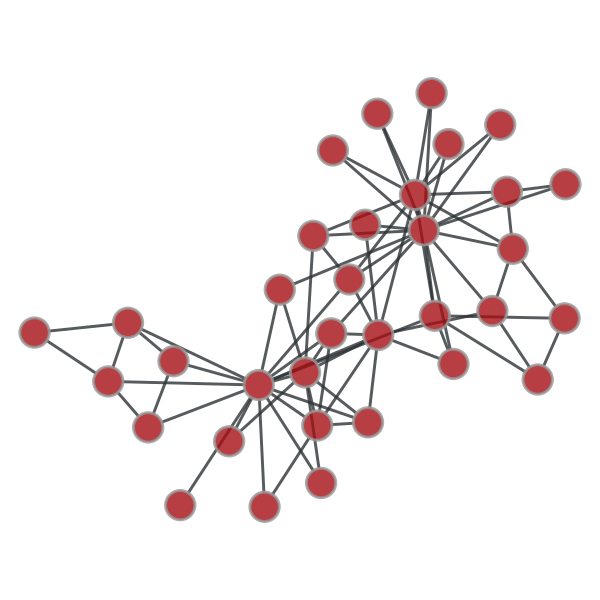

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1a48324190, at 0x1a1a0fde10>

In [13]:
gt.graph_draw(g)

# Another graph example

In [19]:
# If you run this for the first time, download the data with the command below
!wget https://git.skewed.de/count0/graph-tool/raw/2c8c9899dd05549eaef728dabd93dc0759a2d4e0/doc/search_example.xml

--2021-02-23 20:45:36--  https://git.skewed.de/count0/graph-tool/raw/2c8c9899dd05549eaef728dabd93dc0759a2d4e0/doc/search_example.xml
Resolving git.skewed.de... 49.12.93.194
Connecting to git.skewed.de|49.12.93.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3952 (3.9K) [text/plain]
Saving to: 'search_example.xml'

search_example.xml  100%[===================>]   3.86K  --.-KB/s    in 0s      

2021-02-23 20:45:38 (9.89 MB/s) - 'search_example.xml' saved [3952/3952]



In [20]:
gs = gt.load_graph("search_example.xml")

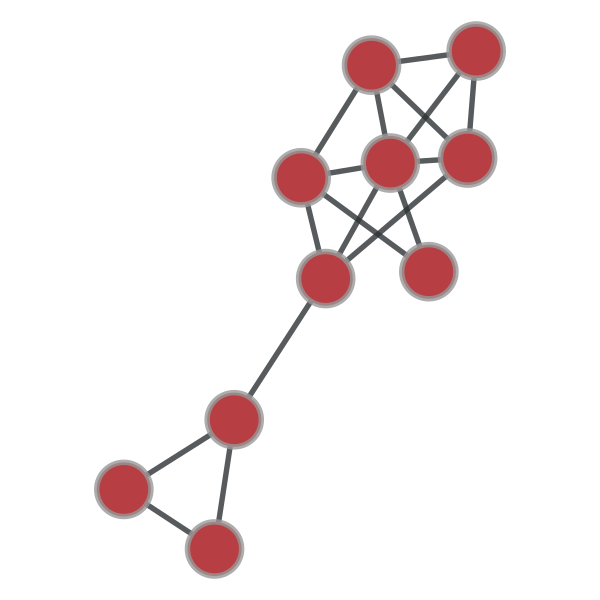

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1a47fa0590, at 0x1a482eee90>

In [21]:
gt.graph_draw(gs)

In [9]:
# TODO: print available edge and vertex properties
# TODO: visualize edge weight and names

# Social graph drawing 101

In [32]:
X_knows = {
    'Mary': ['Peter', 'Albert', 'DavidF', 'Peter'],
    'Judy': ['Bob', 'Alan'],
    'Peter': ['Mary', 'DavidF', 'Jon'],
    'DavidF': ['Albert', 'Joseph', 'Peter', 'Mary'],
    'Jon': ['Peter', 'Joseph', 'DavidE'],
    'DavidE': ['Jon', 'Joseph', 'Albert'],
    'Joseph': ['DavidE', 'Jon', 'DavidF'],
    'Bob': ['Judy', 'Alan'],
    'Alan': ['Bob', 'Mary', 'Judy'],
    'Albert': ['DavidF', 'Mary', 'DavidE'],
}

In [33]:
g = gt.Graph(directed=True)

# Create a graph using Python iterations

Below is a slow and tedious version of what can be done with a single call to `add_edge_list(...)` on a `Graph`.

In [34]:
# Create edge tuples and list of unique names
X_edges = list((n,k) for n in X_knows for k in X_knows[n])
from functools import reduce
X_names = reduce(lambda a,b: set(a).union(b),
                 (X_knows[n] for n in X_knows)
                ).union(X_knows.keys())
X_names = list(X_names)

In [35]:
# Construct a 'StringIndexer' to convert strings to integers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
lem = le.fit(list(X_names))
X_edges = list(map(lem.transform, X_edges))

In [36]:
# Create Graph object and add a string property for names
g2 = gt.Graph()
v_name = g2.new_vertex_property('string')
g2.vertex_properties['name'] = v_name

In [37]:
for vn in lem.classes_:
    v = g2.add_vertex()
    v_name[v] = vn

In [38]:
for f,t in X_edges:
    g2.add_edge(f,t)

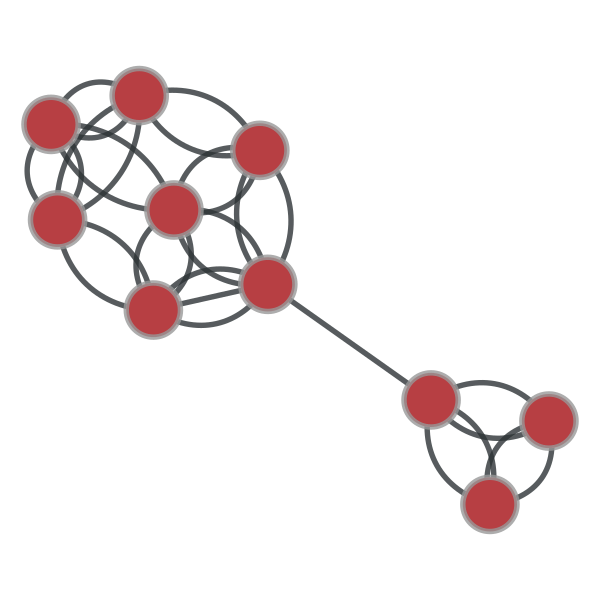

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1a48d74f10, at 0x1a48d7db50>

In [39]:
g2.set_directed(False)
gt.graph_draw(g2)

In [7]:
# TODO: Same as above, make a tidy, undirectional drawing of this graph

# Fast graph construction

In [125]:
# TODO: find one-line call to g.add_edge_list that constructs the X_knows graph
# hint: use nested list comprehension to reshape the dictionary

In [126]:
# TODO: Create an undirected view of this graph

In [127]:
# Tidy up parallel edges

In [128]:
# Try two different layouts presented in the tutorial

In [6]:
# Produce a tidy drawing of the undirected graph

# Graph analysis

Work through the [graph filtering examples](https://graph-tool.skewed.de/static/doc/quickstart.html#graph-views) to draw a view of a relevant graph measure, such as betweenness.

Use one of the graphs constructed above.